# Titanic Dataset Project

In This project we will find out which sort of people were likely to survive.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [2]:
train_df = pd.read_csv("titanic_train.csv")
test_df = pd.read_csv("tested.csv.")

In [3]:
train_df.shape

(891, 12)

In [4]:
test_df.shape

(418, 12)

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


### Finding missing values

1. We have 2 features which has null values. cabin has more than 50% values as null so we'll drop that column and for age we'll fillna with mean

In [9]:
train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
test_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

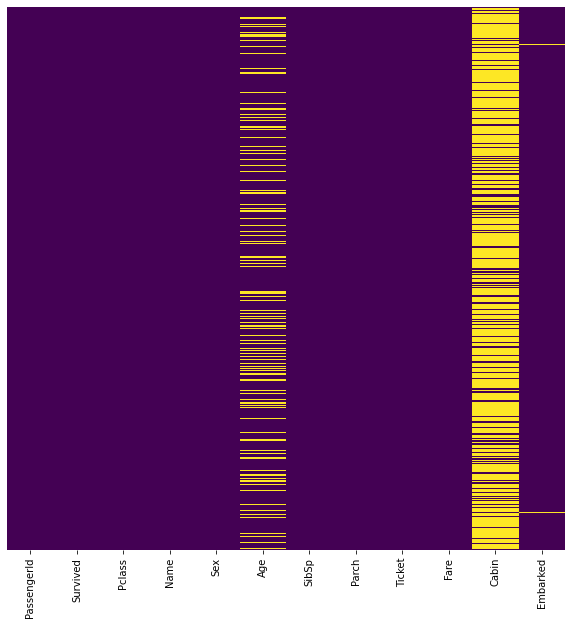

In [11]:
plt.figure(figsize=(10,10))
fig = sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

 We' ll do some more Eda and Check our ratio of who survived and who not survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

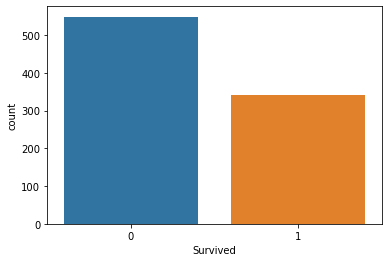

In [12]:
sns.countplot(x='Survived',data=train_df)

Obersvation : Less surviver than non surviver. around 45% people survived

<AxesSubplot:xlabel='Survived', ylabel='count'>

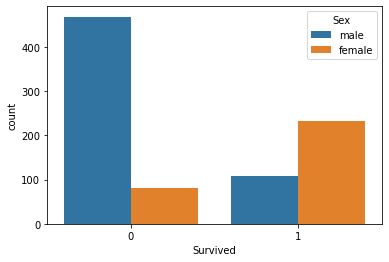

In [13]:
sns.countplot(x='Survived',data=train_df,hue='Sex')

Obervation : There Were more male on the ship still the people who survived are more females


<AxesSubplot:xlabel='Survived', ylabel='count'>

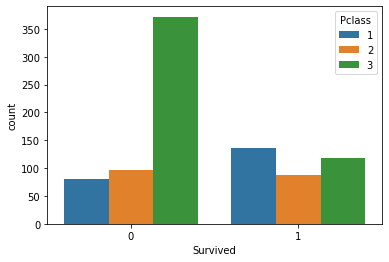

In [14]:
sns.countplot(x='Survived',data=train_df,hue='Pclass')

Observation : People who did not survive were more from class 3 which had the cheapest ticket

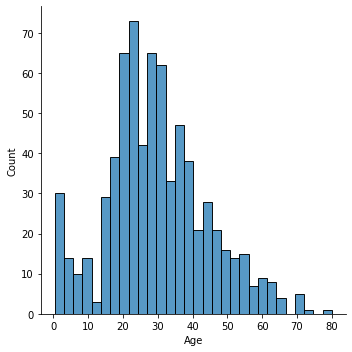

In [15]:
sns.displot(train_df['Age'].dropna(),kde=False,bins=30)

Observation : Maximum people were from a age group of 15 to 40

<AxesSubplot:xlabel='SibSp', ylabel='count'>

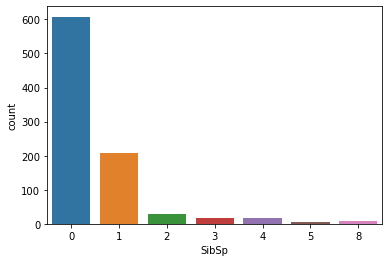

In [16]:
sns.countplot(x='SibSp',data=train_df)

Obervation : Most of the people didnt had siblings or spouse , they were single

In [17]:
import cufflinks as cf
cf.go_offline()

In [18]:
train_df['Fare'].iplot(kind='hist',bins=30,color='green')

### Cleaning Data

We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by filling in the mean age of all the passengers (imputation).
However we can be smarter about this and check the average age by passenger class. For example: Here we can see relation between age and Pclass. Class 3 have an average age of around 37 and class 2 average age of 30 and class 3 of 25.

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

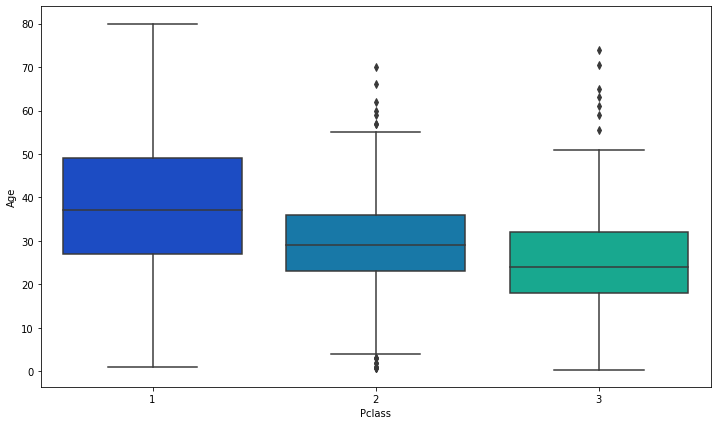

In [19]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train_df,palette='winter')

Here we are finding mean age according to the class

In [20]:
count = train_df['Pclass'].unique()
for x in count:
     age_mean = train_df[train_df['Pclass']== x]
     print(x , np.mean(age_mean['Age']))

3 25.14061971830986
1 38.233440860215055
2 29.87763005780347


I have made a funtion to    

In [21]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [22]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)


In [23]:
test_df['Age'] = test_df[['Age','Pclass']].apply(impute_age,axis=1)

<AxesSubplot:>

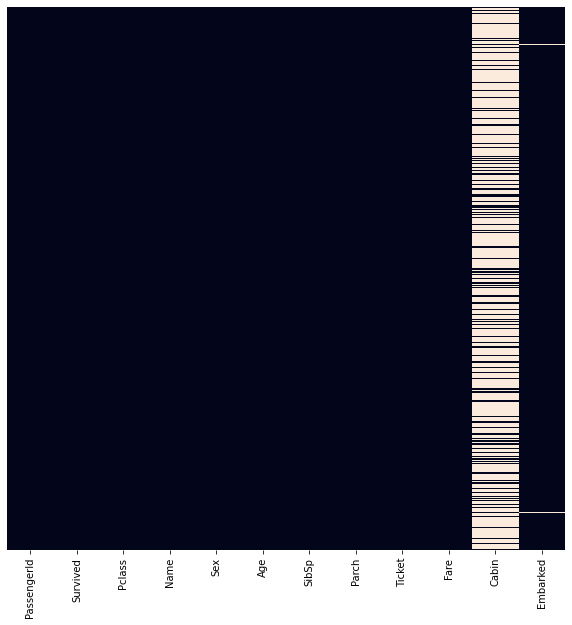

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

Canbin feature has many missing value so we cannot fix that we will directly drop that feature

In [25]:
train_df.drop('Cabin',axis=1,inplace=True)
test_df.drop('Cabin',axis=1,inplace=True)

<AxesSubplot:>

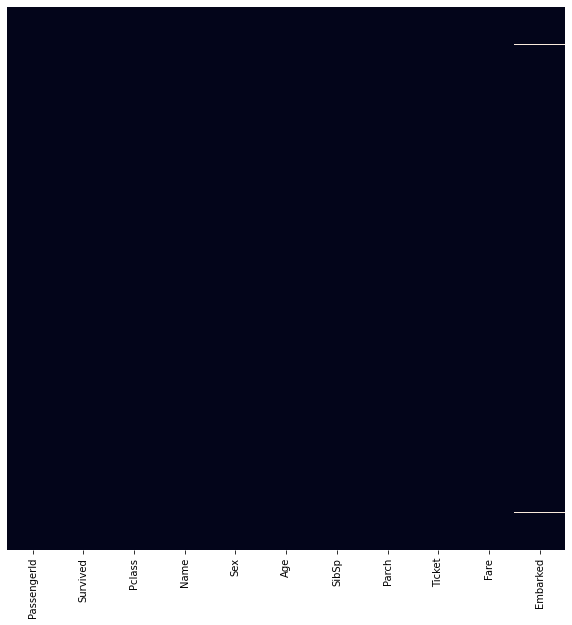

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(train_df.isnull(),yticklabels=False,cbar=False)

we have only 2 rows in Embarked that have na I will directly drop that 2 rows


In [27]:
train_df.dropna(inplace=True)

In [28]:
test_df.dropna(inplace=True)

In [29]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [30]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

I have handled missing values. Now i will handle categorical data with one hot encoding.

In [31]:
Sex = pd.get_dummies(train_df['Sex'],drop_first = True)
Embarked = pd.get_dummies(train_df['Embarked'],drop_first = True)
pclass = pd.get_dummies(train_df['Pclass'],drop_first=True)

In [32]:
Sex_test = pd.get_dummies(test_df['Sex'],drop_first = True)
Embarked_test = pd.get_dummies(test_df['Embarked'],drop_first = True)
pclass_test = pd.get_dummies(test_df['Pclass'],drop_first=True)

In [33]:
train_df = pd.concat([train_df,Sex,Embarked,pclass],axis=1)

In [34]:
test_df = pd.concat([test_df,Sex_test,Embarked_test,pclass_test],axis=1)


In [35]:
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,1,1,0,0,1
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,0,0,1,0,1
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,1,1,0,1,0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,1,0,1,0,1
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,0,0,1,0,1


In [36]:
train_df.drop(['Sex','PassengerId','Name','Sex','Embarked','Ticket','Pclass'],axis=1,inplace=True)

In [37]:
test_df.drop(['PassengerId','Name','Sex','Embarked','Ticket','Pclass'],axis=1,inplace=True)

I'm Concatinating test and train df because they have different number of columns so they wont fit in the model.First i will concatinate them then i will split them into train and test

In [38]:
x = pd.concat([test_df,train_df])
x.reset_index(inplace = True)

In [39]:
train_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


In [40]:
test_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,34.5,0,0,7.8292,1,1,0,0,1
1,1,47.0,1,0,7.0000,0,0,1,0,1
2,0,62.0,0,0,9.6875,1,1,0,1,0
3,0,27.0,0,0,8.6625,1,0,1,0,1
4,1,22.0,1,1,12.2875,0,0,1,0,1


Now this data is perfect for machine learning as everything is numerical.

#### Train Test split

In [41]:
y = x['Survived']
x = x.drop(['Survived'],axis=1)

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, 
                                                    random_state=101)

### Training And predicting

In [44]:
from sklearn.linear_model import LogisticRegression

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [46]:
pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(x_train, y_train)


C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [47]:
print("Testing Accuracy : ", pipe.score(x_test,y_test))
print("Training Accuracy: ", pipe.score(x_train,y_train))

Testing Accuracy :  0.8775510204081632
Training Accuracy:  0.8512035010940919


C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.



### Evaluate

In [48]:
predicted = pipe.predict(x_test)
from sklearn.metrics import confusion_matrix,classification_report,recall_score,precision_score,f1_score
print(confusion_matrix(y_test,predicted))
print(classification_report(y_test,predicted))

[[228  16]
 [ 32 116]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       244
           1       0.88      0.78      0.83       148

    accuracy                           0.88       392
   macro avg       0.88      0.86      0.87       392
weighted avg       0.88      0.88      0.88       392



C:\Users\91814\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning:

Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.

